## Two dimensional UMAP representations of the alloy compostitons (Experimental as well as Suggested)


In [1]:
import pandas as pd
import numpy as np

### UMAP representation for YS

In [2]:
df_all = pd.read_csv('data/EI_UMaP/Nb_alloy_YS_all.csv')
df_all.head()

,alloy,temp,YS_Mpa,std,ei,formula,label
0,Nb99Zr1,24,255.80,NaN,NaN,Nb99.0Zr1.0,0
1,Nb95Zr5,16,425.49,NaN,NaN,Nb94.9Zr5.1,0
2,Nb95V5,24,372.33,NaN,NaN,Nb91.2V8.8,0
3,Nb88.5Hf10Ti1Zr0.5,24,347.51,NaN,NaN,Nb92.0Hf5.4Ti2.0Zr0.5,0
4,Nb80Ta10W10,24,413.70,NaN,NaN,Nb88.7Ta5.7W5.6,0


In [3]:
df_all_features = df_all[['formula','temp','YS_Mpa']]
df_all_features.columns = ['formula','T','target']
df_all_features

,formula,T,target
0,Nb99.0Zr1.0,24,255.800000
1,Nb94.9Zr5.1,16,425.490000
2,Nb91.2V8.8,24,372.330000
3,Nb92.0Hf5.4Ti2.0Zr0.5,24,347.510000
4,Nb88.7Ta5.7W5.6,24,413.700000
5,Nb74.9Ta17.7W6.2Zr1.3,24,479.200000
6,Nb79.3Ta19.5Zr1.2,27,493.020000
7,Nb77.6Ti17.7Zr4.7,22,491.400000
8,Nb96.4W2.6Zr1.0,24,450.930000
9,Nb92.9C0.8W5.3Zr1.1,24,534.360000


### Featurization 

In [5]:
from cbfv.composition import generate_features
X_feature_all, y_all, formulae_exp, skipped_exp= generate_features(df_all_features,elem_prop='f3_revised',drop_duplicates=False,extend_features=False)

# X_feature_all

Processing Input Data: 100%|██████████████████| 30/30 [00:00<00:00, 8403.17it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████████████| 30/30 [00:00<00:00, 5458.49it/s]

	Creating Pandas Objects...


In [6]:
#print(X_train_unscaled.columns)
from sklearn.preprocessing import StandardScaler
total_columns = int((X_feature_all.shape[1])/3) 
X_featue_all_avg = X_feature_all.iloc[:,0:total_columns]



scaler = StandardScaler()
X_featue_all_avg_scaled = scaler.fit_transform(X_featue_all_avg)


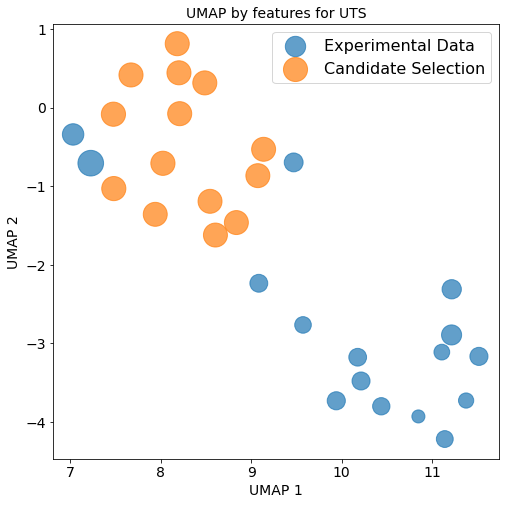

array([ 8.0239935, -0.7083569], dtype=float32)

In [9]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

reducer = umap.UMAP(random_state=56, n_neighbors =7)
ar_umap=reducer.fit_transform(X_featue_all_avg_scaled)
ar_umap
plt.figure(figsize=(8,8))
plt.scatter(ar_umap[0:16:,0],ar_umap[:16,1],label='Experimental Data', s=df_all['YS_Mpa'][:16]/1.5, alpha=.7)
plt.scatter(ar_umap[16:30,0],ar_umap[16:30,1],label='Candidate Selection',s=df_all['YS_Mpa'][16:30]/1.5,alpha=.7)
plt.legend(prop={'size': 16})
plt.xlabel('UMAP 1',size=14)
plt.ylabel('UMAP 2',size=14)

plt.title("UMAP by features for UTS",size=14)

# for k, v in pd.DataFrame(ar_umap).iterrows():
#     plt.annotate(k, v)


plt.tick_params(labelsize=14)
plt.show()
df_all_features.iloc[17]

ar_umap[17]     